<a href="https://colab.research.google.com/github/NohaJereen/CMC-6402/blob/main/FINAL_Sampling_500_PULSARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GCfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.1/554.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
from limepy import limepy
import gcfit
from gcfit import analysis
import matplotlib.pyplot as plt
import numpy as np

Import file for cmc Toolkit

In [ ]:
import os
os.environ['GCFIT_DIR'] = '/content/sample_data'
from google.colab import files
uploaded = files.upload()

Saving cmctoolkit.py to cmctoolkit.py


##snapshot load

In [ ]:
import os
import cmctoolkit as cmct

extract_dir = '/content/sample_data'
snap_file_path = os.path.join(extract_dir, 'initial.snap0694.dat.gz')
conv_file_path = os.path.join(extract_dir, 'initial.conv.sh')

snap = cmct.Snapshot(fname=snap_file_path,
                     conv=conv_file_path,
                     dist=9.14, # distance to cluster in kpc
                     z=0.0002*0.1)

print("Snapshot loaded successfully.")

Snapshot loaded successfully.


##cumulative mass of 0694

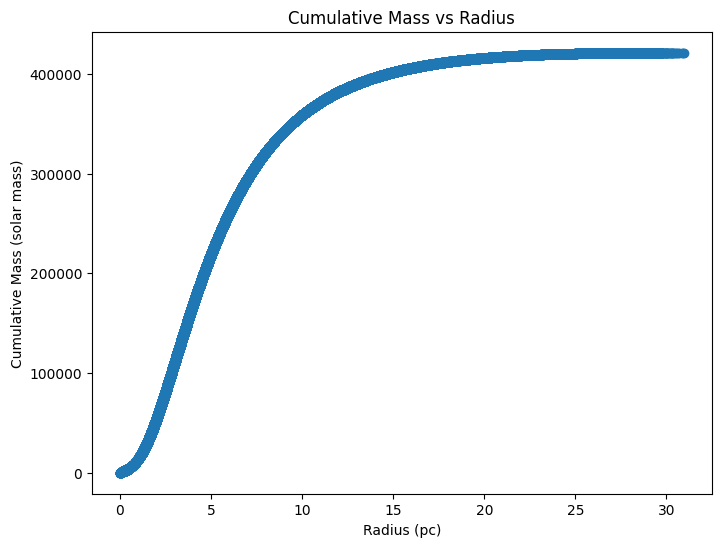

In [ ]:
sample_m = snap.data['m[MSUN]']
sample_pos_r = snap.data['r']
sorted_indices = np.argsort(sample_pos_r)
sorted_r = sample_pos_r[sorted_indices]
sorted_m = sample_m[sorted_indices]

# Calculate cumulative mass
cumulative_mass = np.cumsum(sorted_m)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(sorted_r, cumulative_mass, marker='o', linestyle='-')
plt.title('Cumulative Mass vs Radius')
plt.xlabel('Radius (pc)')
plt.ylabel('Cumulative Mass (solar mass)')
plt.show()

#number of NS and BH


In [ ]:
import pandas as pd

# Define flags and types
binflag = (snap.data['binflag'] == 1)  # binarity flag
startype_ns = np.array([13])           # neutron star type identifier
startype_bh = np.array([14])           # black hole type identifier

# Convert radius to pc units
r = snap.convert_units(snap.data['r'],  # distance to cluster center in pc
                       in_unit='code',
                       out_unit='pc')

# Define flags for neutron stars and black holes
nsflag = np.isin(snap.data['startype'], startype_ns)
bhflag = np.isin(snap.data['startype'], startype_bh)

# Count total number of single neutron stars and black holes
num_neutron_stars = np.sum(nsflag & ~binflag)
num_bh = np.sum(bhflag & ~binflag)

print(f'Total number of neutron stars: {num_neutron_stars}')
print(f'Total number of black holes: {num_bh}')

# Get radius values for single neutron stars
neutron_star_radii = r[nsflag & ~binflag]
bh_radii = r[bhflag & ~binflag]

# Find min and max radius limits for single neutron stars
min_radius = np.min(neutron_star_radii)
max_radius = np.max(neutron_star_radii)

min_radius_bh = np.min(bh_radii)
max_radius_bh = np.max(bh_radii)

print(f'bh stars exist from a minimum radius of {min_radius_bh:.2f} pc to a maximum radius of {max_radius_bh:.2f} pc')
print(f'Neutron stars exist from a minimum radius of {min_radius:.2f} pc to a maximum radius of {max_radius:.2f} pc')

Total number of neutron stars: 1803
Total number of black holes: 258
bh stars exist from a minimum radius of 0.01 pc to a maximum radius of 13.30 pc
Neutron stars exist from a minimum radius of 0.04 pc to a maximum radius of 25.82 pc


In [ ]:
# prompt: calculate total mass fraction of bh

# Calculate the total mass of black holes
total_bh_mass = np.sum(snap.data['m[MSUN]'][bhflag & ~binflag])

# Calculate the total mass of the cluster
total_cluster_mass = np.sum(snap.data['m[MSUN]'])

# Calculate the mass fraction of black holes
bh_mass_fraction = total_bh_mass / total_cluster_mass

print(f"Total mass of black holes: {total_bh_mass:.2e} Msun")
print(f"Total mass of the cluster: {total_cluster_mass:.2e} Msun")
print(f"Mass fraction of black holes: {bh_mass_fraction:.4f}")


Total mass of black holes: 3.67e+03 Msun
Total mass of the cluster: 4.21e+05 Msun
Mass fraction of black holes: 0.0087


In [ ]:
# Define radius condition for neutron stars within the specific range
#radius_condition = (r >= 0.72) & (r <= 20.49)
radius_condition = (r >=min_radius) & (r <=max_radius)
neutron_star_condition = nsflag & ~binflag  # single neutron stars

# Filter the data for single neutron stars within the radius range
filtered_indices = radius_condition & neutron_star_condition
filtered_data = {key: value[filtered_indices] for key, value in snap.data.items()}

# Convert filtered data to DataFrame for preview (first 5 rows)
filtered_data_df = pd.DataFrame(filtered_data)
print(filtered_data_df.head())

             id   m[MSUN]         r        vr        vt         E         J  \
18      69872.0  1.242000  0.036801 -0.135110  0.255103 -0.109182  0.009388   
454   1869868.0  1.242000  0.190811 -0.051235  0.251964 -0.103325  0.048077   
505    397008.0  1.260714  0.201309  0.034953  0.226120 -0.109735  0.045520   
1260   715413.0  1.260714  0.310337  0.086130  0.175797 -0.113033  0.054556   
1506   389682.0  1.260714  0.334052 -0.035071  0.039548 -0.130163  0.013211   

      binflag  m0[MSUN]  m1[MSUN]  ...  bacc1  tacc0  tacc1  mass0_0  mass0_1  \
18     -100.0    -100.0    -100.0  ...    NaN    NaN    NaN      NaN      NaN   
454    -100.0    -100.0    -100.0  ...    NaN    NaN    NaN      NaN      NaN   
505    -100.0    -100.0    -100.0  ...    NaN    NaN    NaN      NaN      NaN   
1260   -100.0    -100.0    -100.0  ...    NaN    NaN    NaN      NaN      NaN   
1506   -100.0    -100.0    -100.0  ...    NaN    NaN    NaN      NaN      NaN   

      epoch0  epoch1       ospin      

In [ ]:
result_df = filtered_data_df[['id', 'r']]
result_df.reset_index(drop=True, inplace=True)



##Histrogram sampling

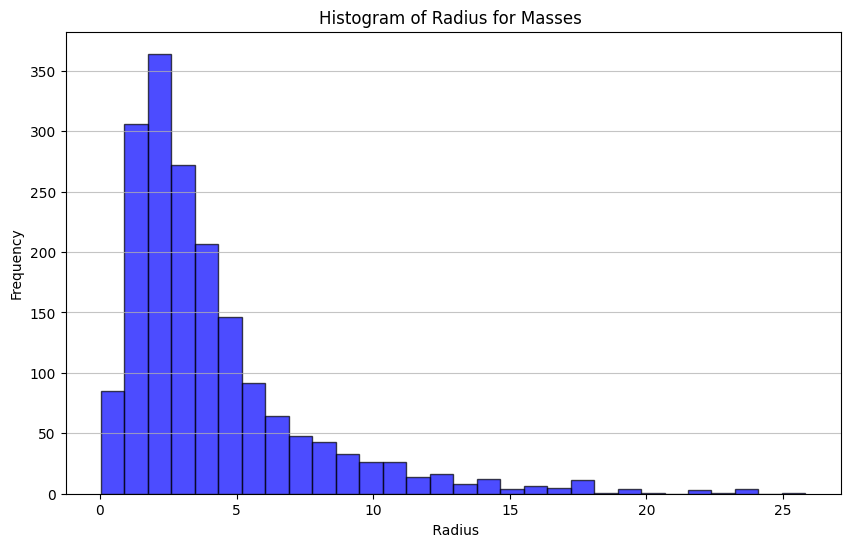

In [ ]:
# Plotting the histogram of projected radius
plt.figure(figsize=(10, 6))
plt.hist(result_df['r'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Radius for Masses ')
plt.xlabel(' Radius')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
import scipy.stats

counts, bins = np.histogram(result_df, bins=500, density=True)
disth = scipy.stats.rv_histogram((counts,bins))
samples_r = disth.rvs(size=500)
len(samples_r)

500

## to check

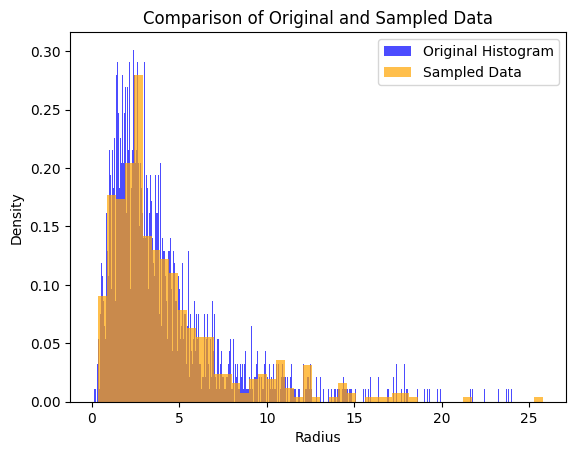

In [ ]:
counts, bins = np.histogram(result_df['r'], bins=500, density=True) # Selecting the 'r' column
disth = scipy.stats.rv_histogram((counts, bins))
samples_r = disth.rvs(size=500)

plt.hist(result_df['r'], bins=500, density=True, alpha=0.7, label='Original Histogram', color='blue')
plt.hist(samples_r, bins=50, density=True, alpha=0.7, label='Sampled Data', color='orange')
plt.title('Comparison of Original and Sampled Data')
plt.xlabel('Radius')
plt.ylabel('Density')
plt.legend()
plt.show()

##Sample R 500

In [ ]:
print (sorted(samples_r))

[np.float64(0.356094972552826), np.float64(0.39234073439475253), np.float64(0.4612333364368459), np.float64(0.4669178717295096), np.float64(0.49319192729862327), np.float64(0.4942587486474252), np.float64(0.5234002001295236), np.float64(0.5288768165072184), np.float64(0.5301618044926527), np.float64(0.5337204368490543), np.float64(0.6125182951141216), np.float64(0.6502855123245052), np.float64(0.6612289850275734), np.float64(0.6699525076754733), np.float64(0.6880473209818191), np.float64(0.7003907274831386), np.float64(0.760721776966506), np.float64(0.7685305698668122), np.float64(0.8306658685131878), np.float64(0.8332325934787947), np.float64(0.8378616001052459), np.float64(0.8504925380224047), np.float64(0.864235028251714), np.float64(0.9349964090430745), np.float64(0.9438185824295223), np.float64(0.9571097671249034), np.float64(0.9685718584397773), np.float64(0.9851058261706964), np.float64(1.0075155195975267), np.float64(1.0096544931143385), np.float64(1.0111859524292022), np.float

##cumulative mass of samples

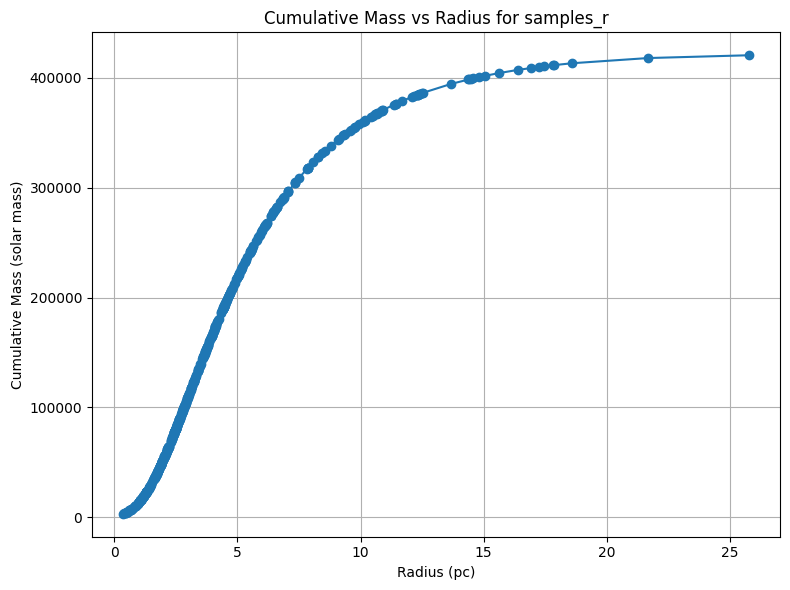

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample_m = snap.data['m[MSUN]']  # Mass values
sample_pos_r = snap.data['r']  # Radius values

# Sort the radius and mass values
sorted_indices = np.argsort(sample_pos_r)
sorted_r = sample_pos_r[sorted_indices]
sorted_m = sample_m[sorted_indices]

# Calculate the cumulative mass
cumulative_mass = np.cumsum(sorted_m)
samples_r_sorted = np.sort(samples_r)

# Interpolating the cumulative mass for the corresponding radii in samples_r
from scipy.interpolate import interp1d
cumulative_mass_interp = interp1d(sorted_r, cumulative_mass, kind='linear', fill_value="extrapolate")

# Calculate cumulative mass for each radius in samples_r
cumulative_mass_samples_r = cumulative_mass_interp(samples_r_sorted)

# Plotting the cumulative mass for the radius samples_r
plt.figure(figsize=(8, 6))
plt.plot(samples_r_sorted, cumulative_mass_samples_r, marker='o', linestyle='-')
plt.title('Cumulative Mass vs Radius for samples_r')
plt.xlabel('Radius (pc)')
plt.ylabel('Cumulative Mass (solar mass)')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
final_sample = pd.DataFrame({'r': samples_r_sorted,'c_mass': cumulative_mass_samples_r})


##compute Pdot_acc

In [ ]:
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant in [m^3 kg^-1 s^-2]
c = 3.0e8        # Speed of light in [m/s]
pc_to_m = 3.0857e16  # Parsec to meters
Msun_to_kg = 1.989e30  # Solar mass to kg

# Inputs: samples_r_sorted and cumulative_mass_samples_r
n_samples = len(samples_r_sorted)  # Assuming samples_r_sorted is pre-sorted
r = samples_r_sorted * pc_to_m  # Convert 3D radius to meters
cmass = cumulative_mass_samples_r * Msun_to_kg  # Convert cumulative mass to kg

# Sample theta uniformly from 0 to π
theta = np.random.uniform(0, np.pi, n_samples)
# Calculate z ensuring z ≤ r
Z_cord = r * np.cos(theta)

# Compute acceleration along the z-axis (in [m/s^2])
az = (G * cmass * Z_cord) / (r**3)

# Contribution to pdot/p (in [s^-1])
P_ac = az / c

# Calculate projected radius (r_proj = √(r^2 - z^2))
proj_r = np.sqrt(r**2 - Z_cord**2)

# Output first few results
print(f"First 5 pdot accs: {P_ac[:5]} s^-1")
print(f"First 5 projected radii: {proj_r[:5]} meters")

First 5 pdot accs: [ 4.84441509e-18 -7.49847919e-18 -1.71183639e-18 -8.39898426e-18
 -4.10992807e-18] s^-1
First 5 projected radii: [9.88891383e+15 8.21195006e+15 1.39666219e+16 4.16848825e+15
 1.33492540e+16] meters


In [ ]:
final_sample = pd.DataFrame({
    'r': samples_r_sorted,
    'z': Z_cord,
    'c_mass': cumulative_mass_samples_r,
    'P_ac': P_ac,
    'proj_r': proj_r
})

##compute Pdot_int

pulsar field

Period,pdot int and checking

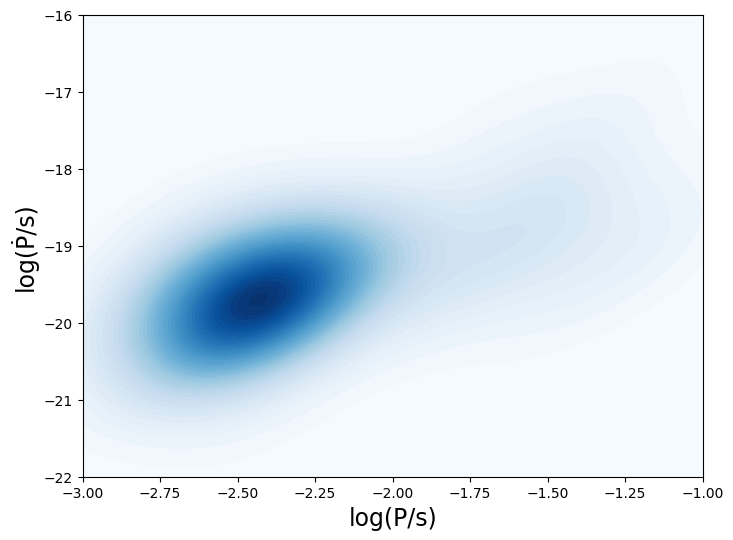

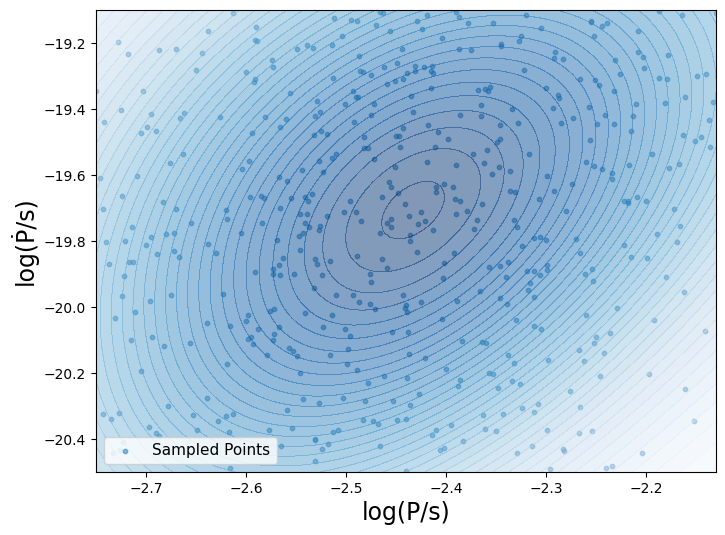

In [ ]:
# Generate the KDE
kde = gcfit.probabilities.pulsars.field_Pdot_KDE(pulsar_db='field_msp.dat')
logP = np.linspace(-3.0, -1.0, 100)
logPdot = np.linspace(-22, -16, 100)
X, Y = np.meshgrid(logP, logPdot)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Plot the KDE
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="Blues")  # Plot KDE
plt.xlabel("log(P/s)",fontsize=17)
plt.ylabel("log(Ṗ/s)",fontsize=17)
#plt.title("Pulsar Field KDE")
plt.show()

# Define the ranges for log(P) and log(Ṗ)
logP_min, logP_max = -2.75, -2.13
logPdot_min, logPdot_max = -20.5, -19.1

# Generate samples
n_samples = 500
samples = []

# Find the maximum density value in the KDE
logP = np.linspace(logP_min, logP_max, 100)
logPdot = np.linspace(logPdot_min, logPdot_max, 100)
X, Y = np.meshgrid(logP, logPdot)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).T
max_density = np.max(Z)

while len(samples) < n_samples:
    logP_sample = np.random.uniform(logP_min, logP_max)
    logPdot_sample = np.random.uniform(logPdot_min, logPdot_max)

    # Evaluate the KDE at this point
    prob = kde([logP_sample, logPdot_sample])[0]
    if np.random.uniform(0, max_density) < prob:
        samples.append([logP_sample, logPdot_sample])

samples = np.array(samples)

plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=10, label="Sampled Points")
plt.contourf(X, Y, Z.reshape(X.shape), levels=50, cmap="Blues", alpha=0.5)  # Original KDE
plt.xlabel("log(P/s)",fontsize=17)
plt.ylabel("log(Ṗ/s)",fontsize=17)
#plt.title("Samples from KDE (Proper Distribution)")
plt.savefig("kde.png", dpi=300, bbox_inches="tight")
plt.legend(fontsize=11)
plt.show()

In [ ]:
# Convert from log scale to linear scale
linear_values = 10 ** samples
P = linear_values[:, 0]
Pdot = linear_values[:, 1]

# Compute Ṗ/P
Pdot_over_P = Pdot / P
P_int_all = np.column_stack((P, Pdot, Pdot_over_P))
P_int = P_int_all[:, 2]

In [ ]:
P_filtered = [p for p in P_int if p >= 10**-17]
print(P_filtered)
len(P_filtered)

[np.float64(1.2906928082955445e-17), np.float64(1.1560383834506466e-17), np.float64(1.0505275003409647e-17), np.float64(1.7271095629755776e-17), np.float64(3.0439202928243025e-17), np.float64(1.4088994789689356e-17), np.float64(2.8281828923703675e-17), np.float64(1.8960971677196485e-17), np.float64(1.840134220888611e-17), np.float64(1.8491679304208435e-17), np.float64(1.3576100078323065e-17), np.float64(1.1410866720239033e-17), np.float64(1.7607846351421977e-17), np.float64(2.142952099557906e-17), np.float64(2.5842493624617048e-17), np.float64(1.907651020138912e-17), np.float64(1.2942546197721642e-17), np.float64(1.9728970627410472e-17), np.float64(1.7768369841451387e-17), np.float64(2.5115844449444614e-17), np.float64(1.4055007951212303e-17), np.float64(1.1813450367819158e-17), np.float64(1.9563645055061777e-17), np.float64(2.317412990504587e-17), np.float64(1.3621808228822815e-17), np.float64(1.1850038991699578e-17), np.float64(2.1014886567981616e-17), np.float64(2.108170531828107e-1

120

In [ ]:
final_sample = pd.DataFrame({
    'r': samples_r_sorted,
    'z': Z_cord,
    'c_mass': cumulative_mass_samples_r,
    'P' : P,
    'P_ac': P_ac,
    'P_int': P_int,
    'proj_r': proj_r
})


#compute Pdot_ag

In [ ]:
##contribution to the period derivative due to the Galactic potential
obs = gcfit.Observations('NGC3201.hdf')
obs.mdata

{'DEC': np.float64(-46.412476),
 'FeH': np.float64(-1.59),
 'Ndot': np.float64(0.0),
 'RA': np.float64(154.403427),
 'age': np.float64(11.5),
 'b': np.float64(8.64),
 'l': np.float64(277.229),
 'vesc': np.float64(34.80709),
 'μ': np.float64(8.574547684863617)}

In [ ]:
import astropy.units as u
Gal_comp = gcfit.probabilities.pulsars.galactic_component(14.804*u.deg, 21.324*u.deg, 9.140*u.kpc)
P_ag = Gal_comp
print(P_ag)

[5.2261702e-19] 1 / s


#compute Pdot_s

In [ ]:
# rate of change of the period due to the Shklovskii effect and µ is the proper motion
# Proper motion components in mas/yr
mu_alpha_cos_delta = -3.599
mu_delta = -5.055

# Calculate total proper motion
mu_total = np.sqrt(mu_alpha_cos_delta**2 + mu_delta**2)
pm = mu_total* u.mas / u.yr
D = 9140* u.pc

P_s= gcfit.probabilities.pulsars.shklovskii_component(pm, D)
print (P_s)

8.549570178051404e-19 1 / s


##EXCEL FILE

In [ ]:
final_sample['P_ag'] =5.2261702e-19
final_sample['P_s'] = 8.549570178051404e-19

#Calculation of combined p_dot

In [ ]:
# Calculate the product of the last 4 columns: 'P_ac', 'P', 'P_int', and 'p_ag' multiplied by Period for P_dot
final_sample['P_dot'] = (final_sample['P_ac'] + final_sample['P_s'] + final_sample['P_int'] + final_sample['P_ag'])*P

##Uncertainty calculation

for p_dot

In [ ]:
from scipy.stats import norm
mean = 0
std_dev = 3e-25  # uncertainty as the standard deviation
noise = norm.rvs(loc=mean, scale=std_dev, size=500)

In [ ]:
final_sample['error_pdot'] = std_dev
final_sample['noise'] = noise
final_sample['P_dot_with_noise'] = final_sample['P_dot'] + final_sample['noise']

for p

In [ ]:
mean = 0
std_dev_p = 2e-16 # uncertainty as the standard deviation
noise_p = norm.rvs(loc=mean, scale=std_dev_p, size=500)
final_sample['error_p'] = std_dev_p
final_sample['noise_p'] = noise_p
final_sample['P_with_noise'] = final_sample['P'] + final_sample['noise_p']

##ORBITAL P

pb

In [ ]:
mean = 0
std_dev_pb = 7e-4  # uncertainty as the standard deviation
noise_pb = norm.rvs(loc=mean, scale=std_dev_pb, size=500)
final_sample['error_pb'] = std_dev_pb
final_sample['noise_pb'] = noise_pb


In [ ]:
final_sample['Pb'] = 1.15e4

In [ ]:
final_sample['Pb_with_noise'] = final_sample['Pb'] + final_sample['noise_pb']

Pb dot

In [ ]:
final_sample['Pb_dot']  = (final_sample['P_ac'] + final_sample['P_s'] + final_sample['P_ag'])* final_sample['Pb']

In [ ]:
from scipy.stats import norm
mean_o = 0
std_dev_o = 3e-14 # uncertainty as the standard deviation
noise_o = norm.rvs(loc=mean, scale=std_dev_o, size=500)

In [ ]:
final_sample['error_pbdot'] = std_dev_o
final_sample['noisepb'] = noise_o
final_sample['Pb_dot_with_noise'] = final_sample['Pb_dot'] + final_sample['noisepb']
final_sample['proj_r']: proj_r

##Everything together

In [ ]:
print(final_sample.to_string(index=False))

        r             z        c_mass        P          P_ac        P_int       proj_r         P_ag          P_s         P_dot   error_pdot         noise  P_dot_with_noise      error_p       noise_p  P_with_noise  error_pb  noise_pb      Pb  Pb_with_noise        Pb_dot  error_pbdot       noisepb  Pb_dot_with_noise
 0.356095  4.790201e+15   3031.984724 0.006502  4.844415e-18 7.565684e-18 9.888914e+15 5.226170e-19 8.549570e-19  8.964226e-20 3.000000e-25 -2.913308e-25      8.964197e-20 2.000000e-16 -8.473346e-17      0.006502    0.0007  0.000141 11500.0   11500.000141  7.155287e-14 3.000000e-14 -3.029265e-15       6.852361e-14
 0.392341 -8.895516e+15   3380.135447 0.002673 -7.498479e-18 4.853359e-18 8.211950e+15 5.226170e-19 8.549570e-19 -3.388619e-21 3.000000e-25 -1.768816e-25     -3.388796e-21 2.000000e-16  2.207688e-16      0.002673    0.0007 -0.000055 11500.0   11499.999945 -7.039041e-14 3.000000e-14 -7.923996e-15      -7.831441e-14
 0.461233 -2.737003e+15   4074.655907 0.002720 -1.71

#'r' in arcmin from parsec

In [ ]:
s = 1.0  # radius in parsecs
d = 9140  # distance from the sun in parsecs
#final_sample['r'] = (final_sample['r']/d)* (206265 / 60) #206265: conversion factor from radians to arcseconds
final_sample['r'] = (final_sample['r'] * 3437.75/d)

##Excel file with required columns only

In [ ]:
import pandas as pd
import numpy as np

# Select all 500 rows
data = final_sample[['r', 'P_with_noise', 'error_p', 'P_dot_with_noise', 'error_pdot']].copy()

# Randomly select 250 rows for Pb-related columns
pb_data = final_sample[['Pb_with_noise', 'error_pb', 'Pb_dot_with_noise', 'error_pbdot']].sample(n=250, random_state=42)

# Create a new DataFrame with all 500 rows, initializing Pb-related columns with NaN
data = data.assign(Pb_with_noise=np.nan, error_pb=np.nan, Pb_dot_with_noise=np.nan, error_pbdot=np.nan)

# Assign the sampled values back to random 250 indices in the new DataFrame
data.loc[pb_data.index, ['Pb_with_noise', 'error_pb', 'Pb_dot_with_noise', 'error_pbdot']] = pb_data.values

# Add an 'id' column
data.insert(0, 'id', range(1, len(data) + 1))

data = data.fillna("NaN")  # Replace NaN values with the string "NaN"



# Save to Excel
data.to_excel('694orb2.xlsx', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Select all 500 rows
data = final_sample[['r', 'P_with_noise', 'error_p', 'P_dot_with_noise', 'error_pdot',
                     'Pb_with_noise', 'error_pb', 'Pb_dot_with_noise', 'error_pbdot','proj_r']].copy()

# Add an 'id' column
data.insert(0, 'id', range(1, len(data) + 1))

# Replace NaN values with the string "NaN"
data = data.fillna("NaN")

# Save to Excel
data.to_excel('694orb2.xlsx', index=False)


##check trumpet JUST P_ac

##SAMPLE GENERATION

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
# Step 1: Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

# Step 3: Load the Excel file
data = pd.read_excel(file_name)



sampled_d = data.sample(n=10)


r_array = sampled_d['r'].to_numpy()
p_with_noise_array = sampled_d['P'].to_numpy()
p_dot_with_noise_array = sampled_d['Pdot'].to_numpy()
#proj_r = sampled_d['proj_r'].to_numpy()

pb_with_noise_array = sampled_d['Pb'].to_numpy()
pb_dot_with_noise_array = sampled_d['Pbdot'].to_numpy()
pulsar_ids = sampled_d['id'].astype(str).to_numpy()  # Convert IDs to strings

sigma_pdot= sampled_d['ΔPdot'].to_numpy()
sigma_p= sampled_d['ΔP'].to_numpy()

sigma_pbdot= sampled_d['ΔPbdot'].to_numpy()
sigma_pb= sampled_d['ΔPb'].to_numpy()
pulsar_positions = proj_r
pulsar_periods = p_with_noise_array
pdot = 2e-17 #p_dot_with_noise_array
p_p = pdot / pulsar_periods


pulsar_orb_periods = pb_with_noise_array
pbdot = pb_dot_with_noise_array # pdot values
pb= pb_with_noise_array
# Calculate pdot/p for the pulsars
pb_p = pbdot / pulsar_orb_periods

# Compute uncertainties for p_p
p_p_err = p_p * np.sqrt((sigma_pdot / pdot) ** 2 + (sigma_p / pulsar_periods) ** 2)

# Compute uncertainties for pb_p
pb_p_err = pb_p * np.sqrt((sigma_pbdot / pbdot) ** 2 + (sigma_pb / pulsar_orb_periods) ** 2)

Please upload your file:


Saving 10.4.xlsx to 10.4 (1).xlsx
Uploaded file: 10.4 (1).xlsx


<ipython-input-93-39cc2edda915>:53: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(fontsize=14)  # Adjust the value (e.g., 14) as needed


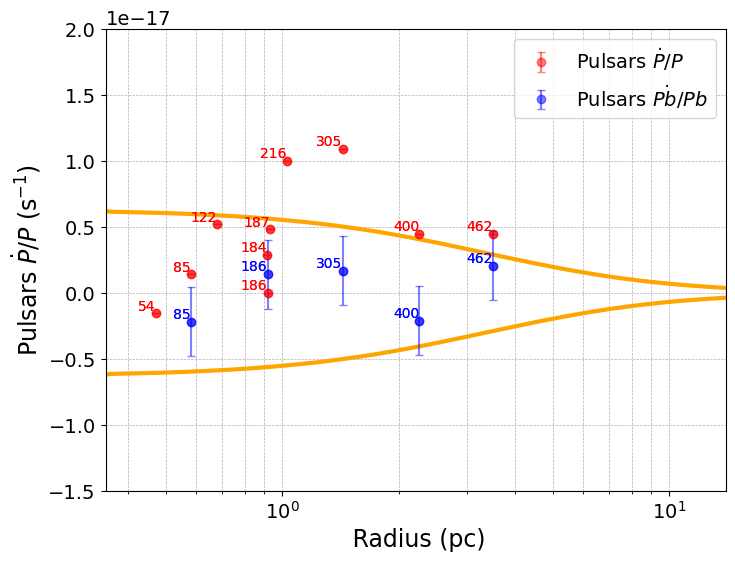

In [ ]:
#pulsar_positions = proj_r  # This was causing the issue
pulsar_positions = r_array# Use r_array to match the size of p_p
pulsar_periods = p_with_noise_array
pdot = p_dot_with_noise_array # pdot values
p_p = pdot / pulsar_periods

pulsar_orb_periods = pb_with_noise_array
pbdot = pb_dot_with_noise_array # pdot values
pb= pb_with_noise_array
# Calculate pdot/p for the pulsars
pb_p = pbdot / pulsar_orb_periods


# Plot P_ac vs R
plt.figure(figsize=(8, 6))
plt.plot(R_values, pdot_p_values, color='orange', linewidth=3)
plt.plot(R_values, pdot_p_values_mirrored, color='orange', linewidth=3 )

# The enumerate function was causing the error due to mismatch in size
# between pulsar_positions and p_p and others. Iterating over the
#correct range solves the issue
for i in range(len(pulsar_positions)): # Change here
    plt.scatter(pulsar_positions[i], p_p[i], color='red', zorder=5, alpha=0.5)
    plt.text(pulsar_positions[i], p_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='red', label=r'Pulsars $\dot{P}/P$')
    plt.scatter(pulsar_positions[i], pb_p[i], color='blue', zorder=5, alpha=0.5)
    plt.text(pulsar_positions[i], pb_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='blue', label=r'Pulsars $\dot{P}_{\mathrm{b}}/P_{\mathrm{b}}$')
#ERR
for i in range(len(pulsar_positions)): # Change here
    #Plot p_p with error bars
    plt.errorbar(pulsar_positions[i], p_p[i], yerr=abs(p_p_err[i]), fmt='o', color='red', zorder=5, alpha=0.5, capsize=3, label="Pulsars $\dot{P}/P$" if i == 0 else "")
    plt.text(pulsar_positions[i], p_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='red')

    # Plot pb_p with error bars
    plt.errorbar(pulsar_positions[i], pb_p[i], yerr=abs(pb_p_err[i]), fmt='o', color='blue', zorder=5, alpha=0.5, capsize=3, label="Pulsars $\dot{Pb}/Pb$" if i == 0 else "")
    plt.text(pulsar_positions[i], pb_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='blue')



plt.xscale('log')  # Logarithmic x-axis
plt.ylim(-15e-18, 20e-18)


#plt.ylim(-10e-18, 10e-18)
plt.xlim(0.35, 14)   # Extend the x-axis to 10 pc
plt.ylabel(r'Pulsars $\dot{P}/P$ (s$^{-1}$)', fontsize=17)
plt.xlabel(' Radius (pc)', fontsize=17)

plt.xticks(fontsize=14)  # Adjust the value (e.g., 14) as needed
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axis
ax.yaxis.get_offset_text().set_fontsize(14)
plt.legend(fontsize=14)  # Adjust the value (e.g., 14) as needed

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("10_3.png", dpi=300, transparent=True)
plt.show()

###PROJECTED RADIUS

In [ ]:
pulsar_positions = proj_r  # This was causing the issue

pulsar_periods = p_with_noise_array
pdot = p_dot_with_noise_array # pdot values
p_p = pdot / pulsar_periods

pulsar_orb_periods = pb_with_noise_array
pbdot = pb_dot_with_noise_array # pdot values
pb= pb_with_noise_array
# Calculate pdot/p for the pulsars
pb_p = pbdot / pulsar_orb_periods


# Plot P_ac vs R
plt.figure(figsize=(8, 6))
plt.plot(R_values, pdot_p_values, color='black', linewidth=3)
plt.plot(R_values, pdot_p_values_mirrored, color='black', linewidth=3 )

# The enumerate function was causing the error due to mismatch in size
# between pulsar_positions and p_p and others. Iterating over the
#correct range solves the issue
for i in range(len(pulsar_positions)): # Change here
    plt.scatter(pulsar_positions[i], p_p[i], color='red', zorder=5, alpha=0.5)
    plt.text(pulsar_positions[i], p_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='red', label=r'Pulsars $\dot{P}/P$')
    plt.scatter(pulsar_positions[i], pb_p[i], color='blue', zorder=5, alpha=0.5)
    plt.text(pulsar_positions[i], pb_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='blue', label=r'Pulsars $\dot{P}_{\mathrm{b}}/P_{\mathrm{b}}$')
#ERR
for i in range(len(pulsar_positions)): # Change here
    #Plot p_p with error bars
    plt.errorbar(pulsar_positions[i], p_p[i], yerr=abs(p_p_err[i]), fmt='o', color='red', zorder=5, alpha=0.5, capsize=3, label="Pulsars $\dot{P}/P$" if i == 0 else "")
    plt.text(pulsar_positions[i], p_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='red')

    # Plot pb_p with error bars
    plt.errorbar(pulsar_positions[i], pb_p[i], yerr=abs(pb_p_err[i]), fmt='o', color='blue', zorder=5, alpha=0.5, capsize=3, label="Pulsars $\dot{Pb}/Pb$" if i == 0 else "")
    plt.text(pulsar_positions[i], pb_p[i], pulsar_ids[i], fontsize=10, ha='right', va='bottom', color='blue')



plt.xscale('log')  # Logarithmic x-axis
#plt.ylim(-15e-18, 20e-18)

plt.ylim(-10e-18, 10e-18)
plt.xlim(0.29, 14)   # Extend the x-axis to 10 pc
plt.ylabel(r'Pulsars $\dot{P}/P$ (s$^{-1}$)', fontsize=17)
plt.xlabel('Projected Radius (pc)', fontsize=17)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("25_5.png", dpi=300, bbox_inches="tight")
plt.show()

##PULSAR FILE GENEREATION

In [ ]:
import pandas as pd
import random
from google.colab import files

# Step 1: Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

# Step 3: Load the Excel file
df = pd.read_excel(file_name)

ss=25


# Randomly select 10 rows
if len(df) <ss:
    print("The file has fewer than 10 rows, so selecting all available rows.")
    selected_rows = df
else:
    selected_rows = df.sample(n=ss)

# Save the selected rows to an Excel file
output_excel = "random_rows.xlsx"
selected_rows.to_excel(output_excel, index=False, na_rep="NaN") # Removed sep argument

# Save the selected rows to a TSV file with "NaN" for missing values
output_tsv = "random_rows.tsv"
selected_rows.to_csv(output_tsv, sep="\t", index=False, na_rep="NaN")

print(f"Randomly selected rows saved to: {output_excel} and {output_tsv}")

#files.download(output_tsv)
files.download(output_excel)

WORKS PULSAR ORBITAL

In [ ]:
# !/usr/bin/env python3

from gcfit.util.data import ClusterFile, Dataset


# if __name__ == '__main__':

cluster = 'cmc6402.hdf'

sep = r'\t'

cf = ClusterFile(cluster)


pulsar_fn = 'random_rows.tsv'

# ------------------------------------------------------------------
# Spin period pulsars
# ------------------------------------------------------------------

keys = 'id', 'r', 'P', 'ΔP', 'Pdot', 'ΔPdot'

units = {'r': 'arcmin', 'P': 's', 'ΔP': 's',
          'Pdot': 's/s', 'ΔPdot': 's/s'}

errs = {'ΔP': 'P', 'ΔPdot': 'Pdot'}

spin = Dataset('pulsar/spin')

spin.read_data(pulsar_fn, delim=sep, keys=keys, units=units, errors=errs)

spin.add_metadata(
    'source',
    '2024MNRAS.530.1436V;2012ApJ...745..109L;2003ApJ...599..475P'
)

spin.add_metadata('m', 1.6)

cf.add_dataset(spin)

# ------------------------------------------------------------------
# Orbital period pulsars
# ------------------------------------------------------------------

keys = 'id', 'r', 'Pb', 'ΔPb', 'Pbdot', 'ΔPbdot'

units = {'r': 'arcmin', 'Pb': 's', 'ΔPb': 's',
          'Pbdot': 's/s', 'ΔPbdot': 's/s'}

errs = {'ΔPb': 'Pb', 'ΔPbdot': 'Pbdot'}

filter_ = ("Pbdot.notna()", )

orbital = Dataset('pulsar/orbital')

orbital.read_data(pulsar_fn, delim=sep, keys=keys, units=units, errors=errs,
                  filter_=filter_)

orbital.add_metadata(
    'source',
    '2024MNRAS.530.1436V;2012ApJ...745..109L;2003ApJ...599..475P'
)

orbital.add_metadata('m', 1.6)

cf.add_dataset(orbital)

# ------------------------------------------------------------------
# Save file
# ------------------------------------------------------------------

cf.save(force=True, confirm=False)

In [ ]:
import tables

# Open the HDF file
with tables.open_file('40cmc5.hdf', 'r') as file:
    # List all the available groups and datasets
    print(file)